<img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png" align="left" height=100 width=200>

🚀 [**`Kaggle - Shelter Animal Outcomes`**](https://www.kaggle.com/competitions/shelter-animal-outcomes) 🚀

# 📚 Libraries

In [1]:
# DATA MANIPULTION 
import pandas as pd 
import numpy as np
import gzip

# DATA VIZ
import matplotlib.pyplot as plt
import seaborn as sns

# STATS
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

# MACHINE LEARNING
## PREPROCESSING
from sklearn.impute import SimpleImputer, KNNImputer
## MODEL SELECTION
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
## SCALERS
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
## CLASSIFICATION MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
## EVALUATION
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve
## MODEL TUNING
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#  🐈 Dataset

In [2]:
data_train = pd.read_csv('train.csv')
data_train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [3]:
data_test = pd.read_csv('test.csv')
data_test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [4]:
print(f'The shape of the data_train dataset is: {data_train.shape}')
print(f'The shape of the data_test dataset is: {data_test.shape}')

The shape of the data_train dataset is: (26729, 10)
The shape of the data_test dataset is: (11456, 8)


In [5]:
print(data_train.dtypes.value_counts())
print('--'*50)
print(data_test.dtypes.value_counts())

object    10
dtype: int64
----------------------------------------------------------------------------------------------------
object    7
int64     1
dtype: int64


# 🧹 Cleaning the dataset

## 👥 Duplicates?

In [6]:
print(data_train.duplicated().sum())
print(data_test.duplicated().sum())

0
0


## ❓ Missing values?

<AxesSubplot:>

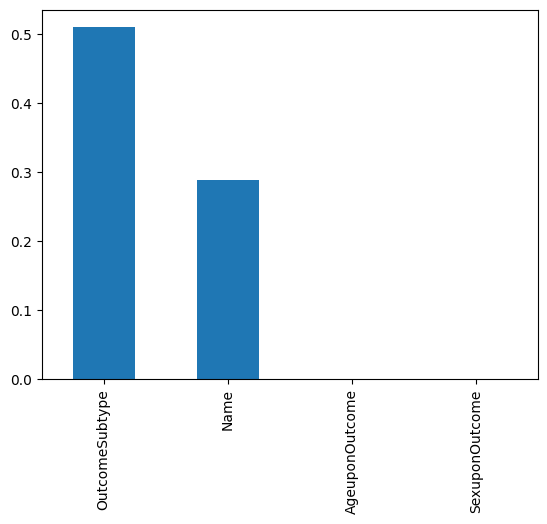

In [7]:
total_missing_data_train = (data_train.isna().sum()/len(data_train)).sort_values(ascending=False)
missing_mask_train = total_missing_data_train > 0
real_missing_values_train = total_missing_data_train[missing_mask_train]
real_missing_values_train.plot.bar()

<AxesSubplot:>

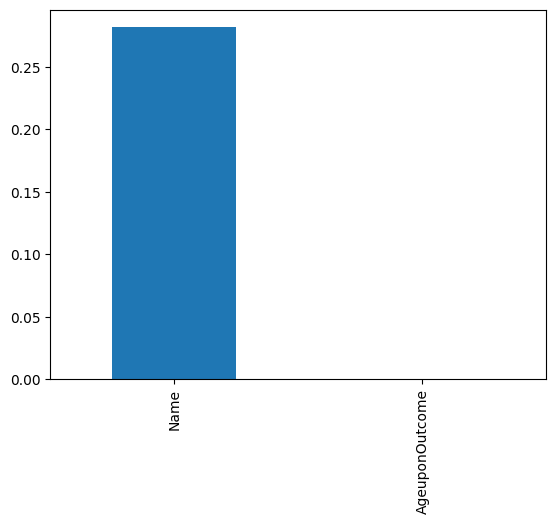

In [8]:
total_missing_data_test = (data_test.isna().sum()/len(data_test)).sort_values(ascending=False)
missing_mask_test = total_missing_data_test > 0
real_missing_values_test = total_missing_data_test[missing_mask_test]
real_missing_values_test.plot.bar()

**`Data_train 'OutcomeSubtype' & 'Name'`**

In [9]:
data_train["OutcomeSubtype"].value_counts()

Partner                7816
Foster                 1800
SCRP                   1599
Suffering              1002
Aggressive              320
Offsite                 165
In Kennel               114
Behavior                 86
Rabies Risk              74
Medical                  66
In Foster                52
Enroute                   8
Court/Investigation       6
At Vet                    4
In Surgery                3
Barn                      2
Name: OutcomeSubtype, dtype: int64

In [10]:
data_train.fillna('Unknown', inplace=True)

In [11]:
data_train['OutcomeSubtype'].value_counts()

Unknown                13612
Partner                 7816
Foster                  1800
SCRP                    1599
Suffering               1002
Aggressive               320
Offsite                  165
In Kennel                114
Behavior                  86
Rabies Risk               74
Medical                   66
In Foster                 52
Enroute                    8
Court/Investigation        6
At Vet                     4
In Surgery                 3
Barn                       2
Name: OutcomeSubtype, dtype: int64

In [12]:
data_train['AnimalType'].value_counts()

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64

We can see there are 2 types of animals: cats 🐈 and dogs 🐕. We can thus split the dataset in two to predict the best outcome for each.

In [13]:
train_dogs = data_train[data_train['AnimalType'] == 'Dog']
train_dogs

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,Unknown,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
4,A667013,Unknown,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,Unknown,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White
...,...,...,...,...,...,...,...,...,...,...
26716,A697158,Max,2015-05-02 21:04:00,Adoption,Offsite,Dog,Neutered Male,2 months,Newfoundland Mix,White/Black
26717,A519949,Bella,2014-06-30 17:34:00,Return_to_owner,Unknown,Dog,Spayed Female,9 years,Bullmastiff Mix,Black
26718,A701044,Unknown,2015-04-28 14:26:00,Adoption,Unknown,Dog,Neutered Male,2 months,Siberian Husky/German Shepherd,Black/Tricolor
26723,A716997,Zeus,2016-01-29 18:52:00,Adoption,Unknown,Dog,Neutered Male,6 years,Staffordshire Mix,Blue/White


In [14]:
train_dogs['OutcomeSubtype'].value_counts()

Unknown                9989
Partner                3911
Foster                  705
Suffering               350
Aggressive              317
Offsite                 101
Behavior                 86
Rabies Risk              46
Medical                  40
In Kennel                30
In Foster                 7
Court/Investigation       6
In Surgery                3
Enroute                   2
At Vet                    2
Name: OutcomeSubtype, dtype: int64

In [15]:
train_cats = data_train[data_train['AnimalType'] == 'Cat']
train_cats

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
3,A683430,Unknown,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
7,A701489,Unknown,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
10,A668402,Unknown,2013-12-05 15:50:00,Transfer,SCRP,Cat,Unknown,2 years,Domestic Shorthair Mix,Black
...,...,...,...,...,...,...,...,...,...,...
26722,A687056,Unknown,2014-08-31 09:00:00,Transfer,SCRP,Cat,Intact Male,5 months,Domestic Shorthair Mix,Orange Tabby
26724,A702446,Unknown,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,A718934,Unknown,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26727,A677478,Unknown,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black


In [16]:
train_cats['OutcomeSubtype'].value_counts()

Partner        3905
Unknown        3623
SCRP           1599
Foster         1095
Suffering       652
In Kennel        84
Offsite          64
In Foster        45
Rabies Risk      28
Medical          26
Enroute           6
Aggressive        3
Barn              2
At Vet            2
Name: OutcomeSubtype, dtype: int64

We redo the same operation for the test dataset.

In [17]:
test_dogs = data_test[data_test['AnimalType'] == 'Dog']
test_cats = data_test[data_test['AnimalType'] == 'Cat']

We can thus remove the entire AnimalType column for each.

In [18]:
test_dogs.drop('AnimalType', axis=1, inplace=True)
test_cats.drop('AnimalType', axis=1, inplace=True)
train_cats.drop('AnimalType', axis=1, inplace=True)
train_dogs.drop('AnimalType', axis=1, inplace=True)

/tmp/ipykernel_498/670608345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dogs.drop('AnimalType', axis=1, inplace=True)
/tmp/ipykernel_498/670608345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cats.drop('AnimalType', axis=1, inplace=True)
/tmp/ipykernel_498/670608345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cats.drop('AnimalType', axis=1, inplace=True)
/tmp/ipykernel_498/670608345.py:4: Setting

In [19]:
test_dogs = test_dogs.reset_index()
test_cats = test_cats.reset_index()
train_dogs = train_dogs.reset_index()
train_cats = train_cats.reset_index()

In [20]:
test_dogs.drop('index', axis=1, inplace=True)
test_cats.drop('index', axis=1, inplace=True)
train_dogs.drop('index', axis=1, inplace=True)
train_cats.drop('index', axis=1, inplace=True)

In [21]:
train_dogs.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,Unknown,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Neutered Male,2 years,Pit Bull Mix,Blue/White
2,A667013,Unknown,2013-11-15 12:52:00,Transfer,Partner,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
3,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
4,A671784,Lucy,2014-02-04 17:17:00,Adoption,Unknown,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White


But we still want to keep the ID of each animal.

In [22]:
dog_test_ID = test_dogs["ID"].to_numpy()
dog_test_ID = np.array([dog_test_ID])
dog_test_ID = dog_test_ID.T
test_dogs.drop("ID", axis=1, inplace=True)
cat_test_ID = test_cats["ID"].to_numpy()
cat_test_ID = np.array([cat_test_ID])
cat_test_ID = cat_test_ID.T
test_cats.drop("ID", axis=1, inplace=True)

## 🎯 Define features and target

In [23]:
y_train_dogs = train_dogs['OutcomeType']
train_dogs = train_dogs.drop(columns=['OutcomeType'])
y_train_cats = train_cats['OutcomeType']
train_cats = train_cats.drop(columns=['OutcomeType'])

## 📅 Preprocessing the data, adding features

In [24]:
def pre_processing(shelter_train, shelter_test, animal_type):
    #But first, let's drop the ID of the animals and the Subtype of their Outcomes
    shelter_train.drop('AnimalID', axis=1, inplace=True)
    shelter_train.drop("OutcomeSubtype", axis=1, inplace=True)
    #Then, convert to DateTime
    time_train = pd.to_datetime(shelter_train['DateTime'])
    time_test = pd.to_datetime(shelter_test['DateTime'])
    #Pick out the year, month, day, hour, minute
    shelter_train['Year'] = time_train.dt.year
    shelter_test['Year'] = time_test.dt.year
    shelter_train['Month'] = time_train.dt.month
    shelter_test['Month'] = time_test.dt.month
    shelter_train['Day'] = time_train.dt.day
    shelter_test['Day'] = time_test.dt.day
    shelter_train['Hour'] = time_train.dt.hour
    shelter_test['Hour'] = time_test.dt.hour
    shelter_train['Minute'] = time_train.dt.minute
    shelter_test['Minute'] = time_test.dt.minute
    
    shelter_train.drop('DateTime', axis=1, inplace=True)
    shelter_test.drop('DateTime', axis=1, inplace=True)
    
    #Convert the NaN in SexuponOutcome to neutral
    shelter_train['SexuponOutcome'].fillna('Spayed Female', inplace=True)
    shelter_test['SexuponOutcome'].fillna('Spayed Female', inplace=True)
    
    #Begin inputing meaningful features in the Datasets
    def intact_group(sex):
        try:
            intact_type = sex.split()
        except:
            return 0
        if intact_type[0] == 'Neutered' or intact_type[0] == 'Spayed':
            return 1
        elif intact_type[0] == 'Intact':
            return 2
        else:
            return 0
    
    shelter_train["Virginity"] = shelter_train["SexuponOutcome"].apply(intact_group)
    shelter_test["Virginity"] = shelter_test["SexuponOutcome"].apply(intact_group)
    
    def sex_group(sexs):
        try:
            sex_type = sexs.split()
        except:
            return 0
        if sex_type[0] == 'Unknown':
            return 0
        elif sex_type[0] == 'Male':
            return 1
        else:
            return 2
        
    shelter_train["Sex"] = shelter_train["SexuponOutcome"].apply(sex_group)
    shelter_test["Sex"] = shelter_test["SexuponOutcome"].apply(sex_group)
    
    #We've drained as many info as possible from SexuponOutcome, so we can drop it
    shelter_train.drop('SexuponOutcome', axis=1, inplace=True)
    shelter_test.drop('SexuponOutcome', axis=1, inplace=True)
    
    #Check for the name
    def has_name(name):
        if name == 'Unknown':
            return 1
        else:
            return 0
    
    shelter_train["Has_name"] = shelter_train["Name"].apply(has_name)
    shelter_test["Has_name"] = shelter_test["Name"].apply(has_name)
    #We've drained as many info as possible from Name, so we can drop it
    shelter_train.drop('Name', axis=1, inplace=True)
    shelter_test.drop('Name', axis=1, inplace=True)
    
    #Convert the age in days
    #fill the NaN values
    shelter_train['AgeuponOutcome'].fillna('1 month', inplace = True)
    shelter_test['AgeuponOutcome'].fillna('1 month', inplace = True)
    
    #Convert
    def convert_age(age):
        if age == 'Unknown':
            return 3.0
        age_list = age.split()
        try:
            ages = int(age_list[0])
        except ValueError:
            return 3.0
        if age_list[1].find("s") >= 0:
            age_list[1] = age_list[1].replace("s", "")
        if age_list[1] == "year":
            return ages * 365
        elif age_list[1] == "month":
            return ages * 30
        else:
            return ages

        
    shelter_train['AgeuponOutcome'] = shelter_train['AgeuponOutcome'].apply(convert_age)
    shelter_test['AgeuponOutcome'] = shelter_test['AgeuponOutcome'].apply(convert_age)
    
    #Convert Breed to Hair, Aggressiveness, Weight, BreedType

    #hair group (for cats)
    def hair_group(breed):
        if breed.find("Shorthair") != -1:
            return 0
        elif breed.find("Longhair") != -1:
            return 1
        else:
            return 2

    shelter_train["Hairgroup"] = shelter_train["Breed"].apply(hair_group)
    shelter_test["Hairgroup"] = shelter_test["Breed"].apply(hair_group)
    
    #Aggressiveness and weight conversion (for dogs)
    
    def aggressiveness(breed):
        if breed.find('Pit bull') != -1:
            return 1
        elif breed.find('Rottweiler') != -1:
            return 2
        elif breed.find("Husky") != -1:
            return 3
        elif breed.find("Shepherd") != -1:
            return 4
        elif breed.find("Malamute") != -1:
            return 5
        elif breed.find("Doberman") != -1:
            return 6
        elif breed.find("Chow") != -1:
            return 7
        elif breed.find("Dane") != -1:
            return 8
        elif breed.find("Boxer") != -1:
            return 9
        elif breed.find("Akita") != -1:
            return 10
        else:
            return 11
        
    if (animal_type == 'Dog'):
        shelter_train['Aggressiveness'] = shelter_train['Breed'].apply(aggressiveness)
        shelter_test['Aggressiveness'] = shelter_test['Breed'].apply(aggressiveness)
        
    def weight(breed):
        if breed.find("Pit Bull") != -1:
            return 1
        elif breed.find("Husky") != -1:
            return 1
        elif breed.find("Doberman") != -1:
            return 1
        elif breed.find("Boxer") != -1:
            return 1
        elif breed.find("Akita") != -1:
            return 1
        elif breed.find("Chow") != -1:
            return 1
        elif breed.find("Rottweiler") != -1:
            return 2
        elif breed.find("Shepherd") != -1:
            return 2
        elif breed.find("Malamute") != -1:
            return 2
        elif breed.find("Dane") != -1:
            return 2
        else:
            return 3
        
    if (animal_type == 'Dog'):
        shelter_train['Weight'] = shelter_train['Breed'].apply(weight)
        shelter_test['Weight'] = shelter_test['Breed'].apply(weight)

    def color_group(color):
        try:
            color_type = color.split()
        except:
            return "unknown"
        return str(color_type[0])
    
    shelter_train["Color"] = shelter_train["Color"].apply(color_group)
    shelter_test["Color"] = shelter_test["Color"].apply(color_group)
    #Convert each unique label to unique integers
    intval, label = pd.factorize(shelter_train["Color"], sort=True)
    shelter_train["Color"] = pd.DataFrame(intval)
    del intval, label
    intval, label = pd.factorize(shelter_test["Color"], sort=True)
    shelter_test["Color"] = pd.DataFrame(intval)
    del intval, label
        
    #Check if the animal is pure breed or not
    def breed_group(breed_input):
        breed = str(breed_input)
        if (' ' in breed) == False:
            br =  breed
        else:
            breed_list = breed.split()
            try:
                br = breed_list[2] 
            except:
                br = breed_list[1] 
        if (br == "Mix"):
            return 0
        else:
            return 1
        return 1
    
    shelter_train["Breed"] = shelter_train["Breed"].apply(breed_group)
    shelter_test["Breed"] = shelter_test["Breed"].apply(breed_group)
    
    print(shelter_train.head())
    return shelter_train, shelter_test

train_dogs, test_dogs = pre_processing(train_dogs, test_dogs, "Dog")
train_cats, test_cats = pre_processing(train_cats, test_cats, "Cat")

   AgeuponOutcome  Breed  Color  Year  Month  Day  Hour  Minute  Virginity  \
0           365.0      0     36  2014      2   12    18      22          1   
1           730.0      0     22  2015      1   31    12      28          1   
2           730.0      1    119  2013     11   15    12      52          1   
3            30.0      1     13  2014      4   25    13       4          2   
4           150.0      1    102  2014      2    4    17      17          1   

   Sex  Has_name  Hairgroup  Aggressiveness  Weight  
0    2         0          2              11       3  
1    2         0          2              11       1  
2    2         1          2              11       3  
3    2         0          0              11       3  
4    2         0          2              11       1  
   AgeuponOutcome  Breed  Color  Year  Month  Day  Hour  Minute  Virginity  \
0           365.0      0     31  2013     10   13    12      44          1   
1             3.0      0     10  2014      7   11  

## ✂️ Holdout method

In [25]:
X_dogs_train, X_dogs_test, y_dogs_train, y_dogs_test =  train_test_split(train_dogs,y_train_dogs,test_size=0.3)
X_cats_train, X_cats_test, y_cats_train, y_cats_test =  train_test_split(train_cats,y_train_cats,test_size=0.3)

In [26]:
X_dogs_train.shape, X_dogs_test.shape, y_dogs_train.shape, y_dogs_test.shape

((10916, 14), (4679, 14), (10916,), (4679,))

In [27]:
X_cats_train.shape, X_cats_test.shape, y_cats_train.shape, y_cats_test.shape

((7793, 12), (3341, 12), (7793,), (3341,))

In [28]:
print(f'Values for y_dogs_train: \n{y_dogs_train.value_counts()}')
print('=='*50)
print(f'Values for y_cats_train: \n{y_cats_train.value_counts()}')
print('=='*50)
print(f'Values for y_dogs_test: \n{y_dogs_test.value_counts()}')
print('=='*50)
print(f'Values for y_cats_test: \n{y_cats_test.value_counts()}')

Values for y_dogs_train: 
Adoption           4546
Return_to_owner    2998
Transfer           2756
Euthanasia          587
Died                 29
Name: OutcomeType, dtype: int64
Values for y_cats_train: 
Transfer           3865
Adoption           2966
Euthanasia          503
Return_to_owner     353
Died                106
Name: OutcomeType, dtype: int64
Values for y_dogs_test: 
Adoption           1951
Return_to_owner    1288
Transfer           1161
Euthanasia          258
Died                 21
Name: OutcomeType, dtype: int64
Values for y_cats_test: 
Transfer           1640
Adoption           1306
Euthanasia          207
Return_to_owner     147
Died                 41
Name: OutcomeType, dtype: int64


In [29]:
y_dogs_pred_baseline = pd.Series(['Adoption']*len(y_dogs_test))
y_cats_pred_baseline = pd.Series(['Transfer']*len(y_cats_test))

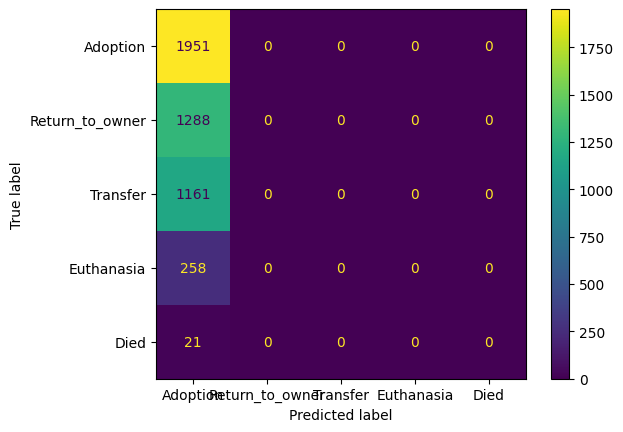

In [30]:
cm_dogs = confusion_matrix(y_dogs_test, y_dogs_pred_baseline, labels = ['Adoption', 'Return_to_owner', 'Transfer', 'Euthanasia', 'Died'])
disp_dogs = ConfusionMatrixDisplay(confusion_matrix=cm_dogs, display_labels=['Adoption', 'Return_to_owner', 'Transfer', 'Euthanasia', 'Died'])
disp_dogs.plot()
plt.show()

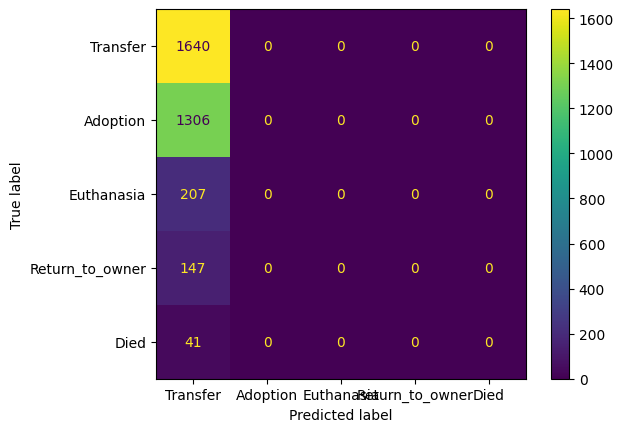

In [31]:
cm_cats = confusion_matrix(y_cats_test, y_cats_pred_baseline, labels = ['Transfer', 'Adoption', 'Euthanasia', 'Return_to_owner', 'Died'])
disp_cats = ConfusionMatrixDisplay(confusion_matrix=cm_cats, display_labels=['Transfer', 'Adoption', 'Euthanasia', 'Return_to_owner', 'Died'])
disp_cats.plot()
plt.show()

In [32]:
accuracy_score(y_dogs_test, y_dogs_pred_baseline)

0.4169694379140842

In [33]:
accuracy_score(y_cats_test, y_cats_pred_baseline)

0.49087099670757256

## 💪 Logistic Regression 

In [34]:
logreg_dogs = LogisticRegression(max_iter = 10_000,
                            penalty = "l2") 
logreg_cats = LogisticRegression(max_iter = 10_000,
                                penalty = 'l2')

In [35]:
logreg_dogs.fit(X_dogs_train, y_dogs_train)
logreg_cats.fit(X_cats_train, y_cats_train)

/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

LogisticRegression(max_iter=10000)

In [36]:
logreg_dogs.score(X_dogs_test, y_dogs_test)

0.569138704851464

In [37]:
logreg_cats.score(X_cats_test, y_cats_test)

0.737503741394792

In [38]:
y_pred_dogs_logreg = logreg_dogs.predict(X_dogs_test)
y_pred_cats_logreg = logreg_cats.predict(X_cats_test)

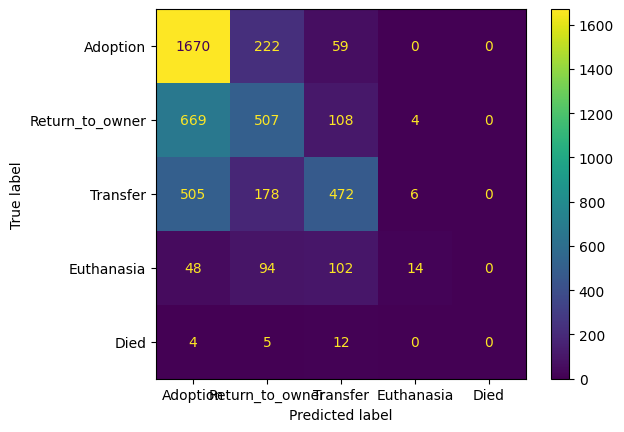

In [39]:
cm_dogs = confusion_matrix(y_dogs_test, y_pred_dogs_logreg, labels = ['Adoption', 'Return_to_owner', 'Transfer', 'Euthanasia', 'Died'])
disp_dogs = ConfusionMatrixDisplay(confusion_matrix=cm_dogs, display_labels=['Adoption', 'Return_to_owner', 'Transfer', 'Euthanasia', 'Died'])
disp_dogs.plot()
plt.show()

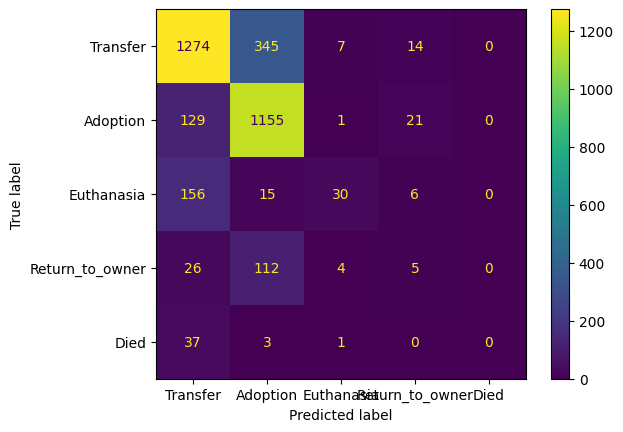

In [40]:
cm_cats = confusion_matrix(y_cats_test, y_pred_cats_logreg, labels = ['Transfer', 'Adoption', 'Euthanasia', 'Return_to_owner', 'Died'])
disp_cats = ConfusionMatrixDisplay(confusion_matrix=cm_cats, display_labels=['Transfer', 'Adoption', 'Euthanasia', 'Return_to_owner', 'Died'])
disp_cats.plot()
plt.show()

In [41]:
print(recall_score(y_dogs_test, y_pred_dogs_logreg, average='weighted'))
print(recall_score(y_cats_test, y_pred_cats_logreg, average='weighted'))

0.569138704851464
0.737503741394792


In [42]:
print(classification_report(y_dogs_test, y_pred_dogs_logreg))
print('=='*50)
print(classification_report(y_cats_test, y_pred_cats_logreg))

/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

                 precision    recall  f1-score   support

       Adoption       0.58      0.86      0.69      1951
           Died       0.00      0.00      0.00        21
     Euthanasia       0.58      0.05      0.10       258
Return_to_owner       0.50      0.39      0.44      1288
       Transfer       0.63      0.41      0.49      1161

       accuracy                           0.57      4679
      macro avg       0.46      0.34      0.34      4679
   weighted avg       0.57      0.57      0.54      4679

                 precision    recall  f1-score   support

       Adoption       0.71      0.88      0.79      1306
           Died       0.00      0.00      0.00        41
     Euthanasia       0.70      0.14      0.24       207
Return_to_owner       0.11      0.03      0.05       147
       Transfer       0.79      0.78      0.78      1640

       accuracy                           0.74      3341
      macro avg       0.46      0.37      0.37      3341
   weighted avg       0.71

/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/clement/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Let's retry with a pipeline

In [49]:
data_train = pd.read_csv('train.csv')
data_train

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
...,...,...,...,...,...,...,...,...,...,...
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black


In [50]:
data_test = pd.read_csv('test.csv')
data_test

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White
...,...,...,...,...,...,...,...,...
11451,11452,NaN,2014-07-08 14:50:00,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
11452,11453,NaN,2014-10-21 12:57:00,Cat,Intact Female,2 weeks,Domestic Shorthair Mix,Blue
11453,11454,NaN,2014-09-29 09:00:00,Cat,Intact Female,1 year,Domestic Shorthair Mix,Calico
11454,11455,Rambo,2015-09-05 17:16:00,Dog,Neutered Male,6 years,German Shepherd Mix,Black/Tan


In [51]:
data_train.isna().sum()

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

In [55]:
knn_imputer = KNNImputer(n_neighbors = 5)
knn_imputer.fit_transform(data_train['AgeuponOutcome'])

ValueError: could not convert string to float: '1 year'

In [52]:
data_test.isna().sum()

ID                   0
Name              3225
DateTime             0
AnimalType           0
SexuponOutcome       0
AgeuponOutcome       6
Breed                0
Color                0
dtype: int64

In [47]:
data_test.fillna('Unknown', inplace=True)

In [48]:
data_test.isna().sum()

ID                0
Name              0
DateTime          0
AnimalType        0
SexuponOutcome    0
AgeuponOutcome    0
Breed             0
Color             0
dtype: int64